In [1]:
import pandas as pd
import numpy as np

import nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import seaborn as sns

sns.set(rc={'figure.figsize':(13,8)})
mpl.rcParams['figure.figsize'] = (16, 12)
mpl.rcParams['axes.grid'] = False

In [2]:
pd.DataFrame(['ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'пен', 'тағыда', 'әрине', 'жоқ', 'сондай', 'осындай', 'осылай', 'солай', 'мұндай', 'бұндай', 'мен', 'сен', 'ол', 'біз', 'біздер', 'олар', 'сіз', 'сіздер', 'маған', 'оған', 'саған', 'біздің', 'сіздің', 'оның', 'бізге', 'сізге', 'оларға', 'біздерге', 'сіздерге', 'оларға', 'менімен', 'сенімен', 'онымен', 'бізбен', 'сізбен', 'олармен', 'біздермен', 'сіздермен', 'менің', 'сенің', 'біздің', 'сіздің', 'оның', 'біздердің', 'сіздердің', 'олардың', 'маған', 'саған', 'оған', 'менен', 'сенен', 'одан', 'бізден', 'сізден', 'олардан', 'біздерден', 'сіздерден', 'олардан', 'айтпақшы', 'сонымен', 'сондықтан', 'бұл', 'осы', 'сол', 'анау', 'мынау', 'сонау', 'осынау', 'ана', 'мына', 'сона', 'әні', 'міне', 'өй', 'үйт', 'бүйт', 'біреу', 'кейбіреу', 'кейбір', 'қайсыбір', 'әрбір', 'бірнеше', 'бірдеме', 'бірнеше', 'әркім', 'әрне', 'әрқайсы', 'әрқалай', 'әлдекім', 'әлдене', 'әлдеқайдан', 'әлденеше', 'әлдеқалай', 'әлдеқашан', 'алдақашан', 'еш', 'ешкім', 'ешбір', 'ештеме', 'дәнеңе', 'ешқашан', 'ешқандай', 'ешқайсы', 'емес', 'бәрі', 'барлық', 'барша', 'бар', 'күллі', 'бүкіл', 'түгел', 'өз', 'өзім', 'өзің', 'өзінің', 'өзіме', 'өзіне', 'өзімнің', 'өзі', 'өзге', 'менде', 'сенде', 'онда', 'менен', 'сенен\tонан', 'одан', 'ау', 'па', 'ей', 'әй', 'е', 'уа', 'уау', 'уай', 'я', 'пай', 'ә', 'о', 'оһо', 'ой', 'ие', 'аһа', 'ау', 'беу', 'мәссаған', 'бәрекелді', 'әттегенай', 'жаракімалла', 'масқарай', 'астапыралла', 'япырмай', 'ойпырмай', 'кәне', 'кәнеки', 'ал', 'әйда', 'кәні', 'міне', 'әні', 'сорап', 'қош-қош', 'пфша', 'пішә', 'құрау-құрау', 'шәйт', 'шек', 'моһ', 'тәк', 'құрау', 'құр', 'кә', 'кәһ', 'күшім', 'күшім', 'мышы', 'пырс', 'әукім', 'алақай', 'паһ-паһ', 'бәрекелді', 'ура', 'әттең', 'әттеген-ай', 'қап', 'түге', 'пішту', 'шіркін', 'алатау', 'пай-пай', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'арс', 'гүрс', 'дүрс', 'қорс', 'тарс', 'тырс', 'ырс', 'барқ', 'борт', 'күрт', 'кірт', 'морт', 'сарт', 'шырт', 'дүңк', 'күңк', 'қыңқ', 'мыңқ', 'маңқ', 'саңқ', 'шаңқ', 'шіңк', 'сыңқ', 'таңқ', 'тыңқ', 'ыңқ', 'болп', 'былп', 'жалп', 'желп', 'қолп', 'ірк', 'ырқ', 'сарт-сұрт', 'тарс-тұрс', 'арс-ұрс', 'жалт-жалт', 'жалт-жұлт', 'қалт-қалт', 'қалт-құлт', 'қаңқ-қаңқ', 'қаңқ-құңқ', 'шаңқ-шаңқ', 'шаңқ-шұңқ', 'арбаң-арбаң', 'бүгжең-бүгжең', 'арсалаң-арсалаң', 'ербелең-ербелең', 'батыр-бұтыр', 'далаң-далаң', 'тарбаң-тарбаң', 'қызараң-қызараң', 'қаңғыр-күңгір', 'қайқаң-құйқаң', 'митың-митың', 'салаң-сұлаң', 'ыржың-тыржың', 'бірақ', 'алайда', 'дегенмен', 'әйтпесе', 'әйткенмен', 'себебі', 'өйткені', 'сондықтан', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'арнайы', 'осындай', 'ғана', 'қана', 'тек', 'әншейін', 'мен', 'да', 'бола', 'бір', 'де', 'сен', 'мені', 'сені', 'және', 'немесе', 'оны', 'еді', 'жатыр', 'деп', 'деді', 'тұр', 'тар', 'жаты', 'болып', ' '], columns = ['stopwords']).to_csv('stopwords.csv', index=False)

# Reading clean text

In [2]:
df = pd.read_csv('Corpus/big_corpus_cleaned.csv')
df['text'] = df['text'].astype(str)
df['label'] = pd.to_numeric(df['label'])
df

,text,label
0,лива туввар сирия аллажатта islamstateқа қарсы...,1
1,террористік иттер бүлікшілерге айналады turke...,1
2,әлхайрдың газваты арнайы аймақ олардан кейін о...,1
3,сириядағы ресей n басып кіру туралы алаңдамауд...,1
4,ядролық соғыс соғысы келе жатыр,1
...,...,...
45387,жақсы өмір сүруге тыйым сала алмайсын,2
45388,дің концертіне жиналған иглздар,2
45389,панданың қалай пайда болғанын енді түсіндім,2
45390,"мүбәрәк болсын жұмаңыз , қабыл болсын дұғаңыз ...",2


# Visualization

In [3]:
n_tops = 20

In [4]:
def get_gram(data_list, n):
    #stop = ['ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'пен', 'тағыда', 'әрине', 'жоқ', 'сондай', 'осындай', 'осылай', 'солай', 'мұндай', 'бұндай', 'мен', 'сен', 'ол', 'біз', 'біздер', 'олар', 'сіз', 'сіздер', 'маған', 'оған', 'саған', 'біздің', 'сіздің', 'оның', 'бізге', 'сізге', 'оларға', 'біздерге', 'сіздерге', 'оларға', 'менімен', 'сенімен', 'онымен', 'бізбен', 'сізбен', 'олармен', 'біздермен', 'сіздермен', 'менің', 'сенің', 'біздің', 'сіздің', 'оның', 'біздердің', 'сіздердің', 'олардың', 'маған', 'саған', 'оған', 'менен', 'сенен', 'одан', 'бізден', 'сізден', 'олардан', 'біздерден', 'сіздерден', 'олардан', 'айтпақшы', 'сонымен', 'сондықтан', 'бұл', 'осы', 'сол', 'анау', 'мынау', 'сонау', 'осынау', 'ана', 'мына', 'сона', 'әні', 'міне', 'өй', 'үйт', 'бүйт', 'біреу', 'кейбіреу', 'кейбір', 'қайсыбір', 'әрбір', 'бірнеше', 'бірдеме', 'бірнеше', 'әркім', 'әрне', 'әрқайсы', 'әрқалай', 'әлдекім', 'әлдене', 'әлдеқайдан', 'әлденеше', 'әлдеқалай', 'әлдеқашан', 'алдақашан', 'еш', 'ешкім', 'ешбір', 'ештеме', 'дәнеңе', 'ешқашан', 'ешқандай', 'ешқайсы', 'емес', 'бәрі', 'барлық', 'барша', 'бар', 'күллі', 'бүкіл', 'түгел', 'өз', 'өзім', 'өзің', 'өзінің', 'өзіме', 'өзіне', 'өзімнің', 'өзі', 'өзге', 'менде', 'сенде', 'онда', 'менен', 'сенен\tонан', 'одан', 'ау', 'па', 'ей', 'әй', 'е', 'уа', 'уау', 'уай', 'я', 'пай', 'ә', 'о', 'оһо', 'ой', 'ие', 'аһа', 'ау', 'беу', 'мәссаған', 'бәрекелді', 'әттегенай', 'жаракімалла', 'масқарай', 'астапыралла', 'япырмай', 'ойпырмай', 'кәне', 'кәнеки', 'ал', 'әйда', 'кәні', 'міне', 'әні', 'сорап', 'қош-қош', 'пфша', 'пішә', 'құрау-құрау', 'шәйт', 'шек', 'моһ', 'тәк', 'құрау', 'құр', 'кә', 'кәһ', 'күшім', 'күшім', 'мышы', 'пырс', 'әукім', 'алақай', 'паһ-паһ', 'бәрекелді', 'ура', 'әттең', 'әттеген-ай', 'қап', 'түге', 'пішту', 'шіркін', 'алатау', 'пай-пай', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'арс', 'гүрс', 'дүрс', 'қорс', 'тарс', 'тырс', 'ырс', 'барқ', 'борт', 'күрт', 'кірт', 'морт', 'сарт', 'шырт', 'дүңк', 'күңк', 'қыңқ', 'мыңқ', 'маңқ', 'саңқ', 'шаңқ', 'шіңк', 'сыңқ', 'таңқ', 'тыңқ', 'ыңқ', 'болп', 'былп', 'жалп', 'желп', 'қолп', 'ірк', 'ырқ', 'сарт-сұрт', 'тарс-тұрс', 'арс-ұрс', 'жалт-жалт', 'жалт-жұлт', 'қалт-қалт', 'қалт-құлт', 'қаңқ-қаңқ', 'қаңқ-құңқ', 'шаңқ-шаңқ', 'шаңқ-шұңқ', 'арбаң-арбаң', 'бүгжең-бүгжең', 'арсалаң-арсалаң', 'ербелең-ербелең', 'батыр-бұтыр', 'далаң-далаң', 'тарбаң-тарбаң', 'қызараң-қызараң', 'қаңғыр-күңгір', 'қайқаң-құйқаң', 'митың-митың', 'салаң-сұлаң', 'ыржың-тыржың', 'бірақ', 'алайда', 'дегенмен', 'әйтпесе', 'әйткенмен', 'себебі', 'өйткені', 'сондықтан', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'арнайы', 'осындай', 'ғана', 'қана', 'тек', 'әншейін', 'мен', 'да', 'бола', 'бір', 'де', 'сен', 'мені', 'сені', 'және', 'немесе', 'оны', 'еді', 'жатыр', 'деп', 'деді', 'тұр', 'тар', 'жаты', 'болып', ' ']
    vectorizer = CountVectorizer(ngram_range =(n, n))
    #vectorizer = TfidfVectorizer(ngram_range = (n,n))
    X = vectorizer.fit_transform(data_list)
    features = (vectorizer.get_feature_names())
    sums = X.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0,col] ))
    ranking = pd.DataFrame(data1, columns = ['term','value'])
    words = (ranking.sort_values('value', ascending = False))
    return  words

def plotting_ngram(gram_df, n):
    gram = pd.DataFrame(gram_df[:n])
    d = gram.set_index('term').T.to_dict('rank')[:1]

    G = nx.Graph()
    
    for k, v in d[0].items():
        G.add_edge(k.split()[0], k.split()[1], weight=(v * 10))

    fig, ax = plt.subplots(figsize=(12, 8))

    pos = nx.spring_layout(G, k=2)

    nx.draw_networkx(G, pos,
                     font_size=16,
                     width=3,
                     edge_color='blue',
                     node_color='red',
                     with_labels = False,
                     ax=ax)

    for key, value in pos.items():
        x, y = value[0]+.135, value[1]+.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='purple', alpha=0.25),
                horizontalalignment='center', fontsize=10)
    
    plt.show()

In [5]:
df.loc[df['label'] == 0]

,text,label
1794,"пайғамбарымыздың артынан еру, бұл біздің ең ба...",0
1795,"күмәнданған кезде, шоқыну керек деген сияқты с...",0
1796,сұрақ ассаламу алайкум уа раxматуллаһи уа бара...,0
1797,"сұрақ егер біреу не үшін намаз оқу керек , деп...",0
1798,"сұрақ ибн баз, ибн усаймин, альбани бұлар мүшр...",0
...,...,...
38523,"әлғаний бай, ештеңеге мұқтаж емес",0
38524,"әлмааниғ тыйым салушы, тоқтатушы",0
38525,"әннуур нұр иесі, нұрландырушы",0
38526,ассабуур аса сабырлы club qissa angimeler,0


In [6]:
nltk

<module 'nltk' from 'c:\\users\\zhastay\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\nltk\\__init__.py'>

In [8]:
unigram_df_t = get_gram(df.loc[df['label'] == 1].text.tolist(), 1).head(n_tops*10)
print ("\n\nUnigram extremistical : \n", unigram_df_t.head(n_tops))

unigram_df_n = get_gram(df.loc[df['label'] == 0].text.tolist(), 1).head(n_tops*10)
print ("\n\nUnigram neutral : \n", unigram_df_n.head(n_tops))



Unigram extremistical : 
           term  value
11007     және   3425
15174      мен   2204
6189       бұл   1690
29499     үшін   1202
7219       деп   1039
5807       біз    988
17213     олар    959
17211       ол    816
27269    қарсы    778
22821   туралы    664
17592      осы    589
17274     оның    589
17219  олардың    581
5935     бірақ    574
6853        да    554
5933       бір    534
12494    керек    502
11676    ислам    497
4174       бар    488
8156      емес    483


Unigram neutral : 
           term  value
16450      бір  10954
47689      мен   9779
4317      алла   9535
20395      деп   9001
19281       да   8891
54330       ол   8465
33575     және   8246
19935       де   7705
17288      бұл   6847
98364     үшін   6699
19960    деген   5106
54336     олар   4807
11327      бар   4790
1651      адам   4749
55939     оған   4480
3748        ал   4334
4363   алланың   4313
14964   болады   4284
54517     оның   4028
64532      сол   4007


[Text(0, 0, 'және'),
 Text(0, 0, 'мен'),
 Text(0, 0, 'бұл'),
 Text(0, 0, 'үшін'),
 Text(0, 0, 'деп'),
 Text(0, 0, 'біз'),
 Text(0, 0, 'олар'),
 Text(0, 0, 'ол'),
 Text(0, 0, 'қарсы'),
 Text(0, 0, 'туралы'),
 Text(0, 0, 'осы'),
 Text(0, 0, 'оның'),
 Text(0, 0, 'олардың'),
 Text(0, 0, 'бірақ'),
 Text(0, 0, 'да'),
 Text(0, 0, 'бір'),
 Text(0, 0, 'керек'),
 Text(0, 0, 'ислам'),
 Text(0, 0, 'бар'),
 Text(0, 0, 'емес')]

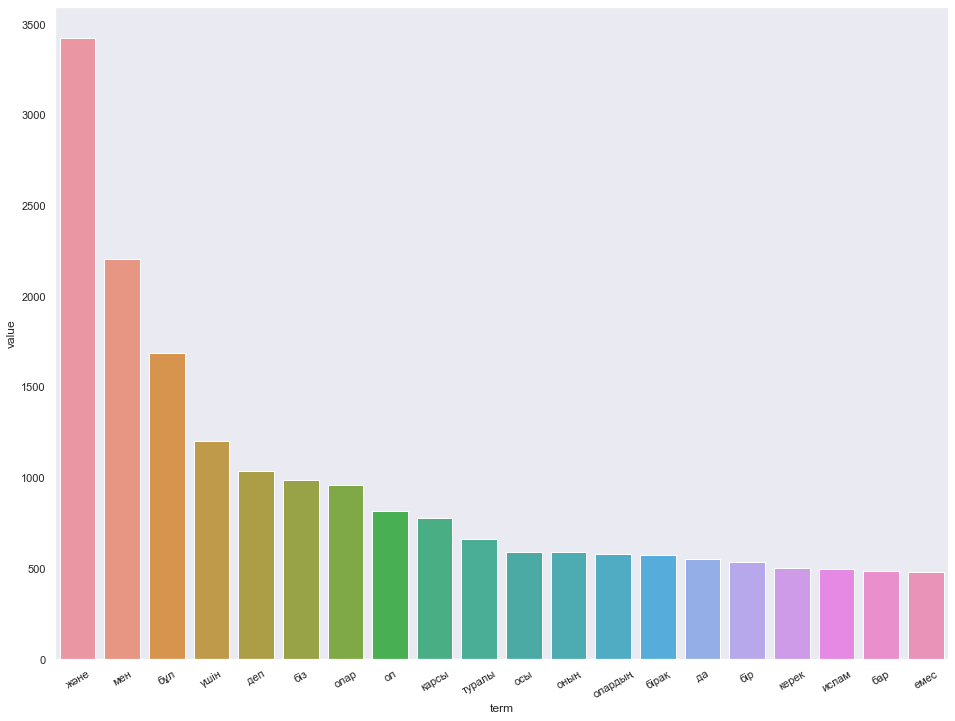

In [9]:
g = sns.barplot(x="term", y="value", data=unigram_df_t[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'бір'),
 Text(0, 0, 'мен'),
 Text(0, 0, 'алла'),
 Text(0, 0, 'деп'),
 Text(0, 0, 'да'),
 Text(0, 0, 'ол'),
 Text(0, 0, 'және'),
 Text(0, 0, 'де'),
 Text(0, 0, 'бұл'),
 Text(0, 0, 'үшін'),
 Text(0, 0, 'деген'),
 Text(0, 0, 'олар'),
 Text(0, 0, 'бар'),
 Text(0, 0, 'адам'),
 Text(0, 0, 'оған'),
 Text(0, 0, 'ал'),
 Text(0, 0, 'алланың'),
 Text(0, 0, 'болады'),
 Text(0, 0, 'оның'),
 Text(0, 0, 'сол')]

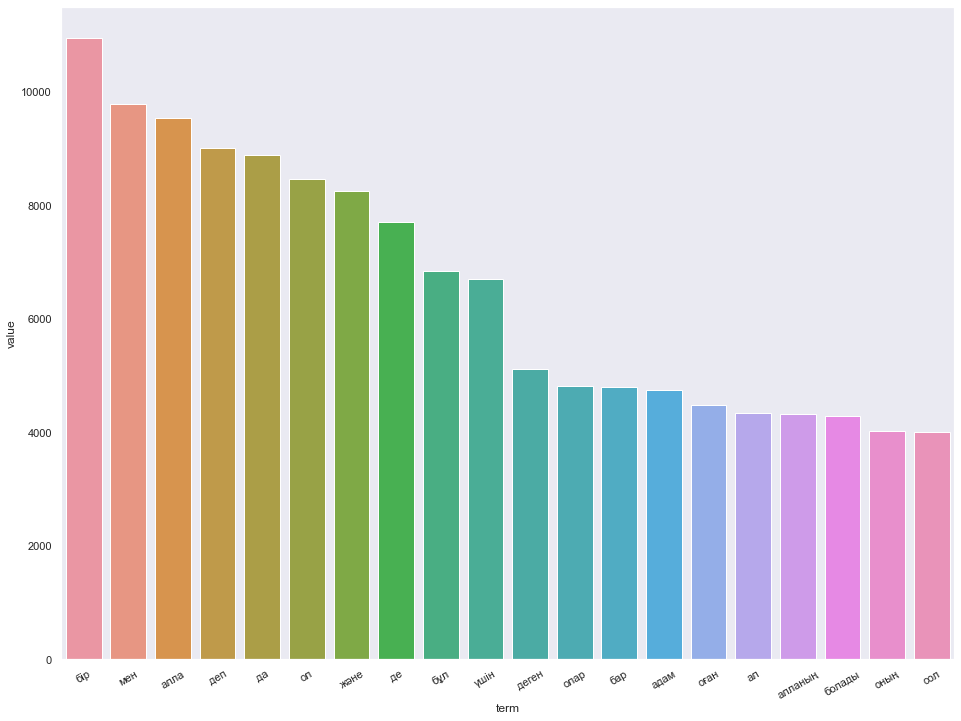

In [10]:
g = sns.barplot(x="term", y="value", data=unigram_df_n[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

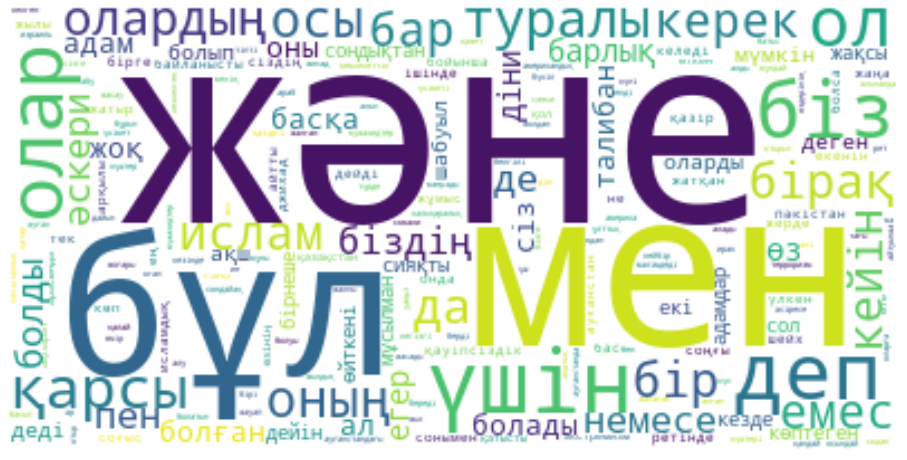

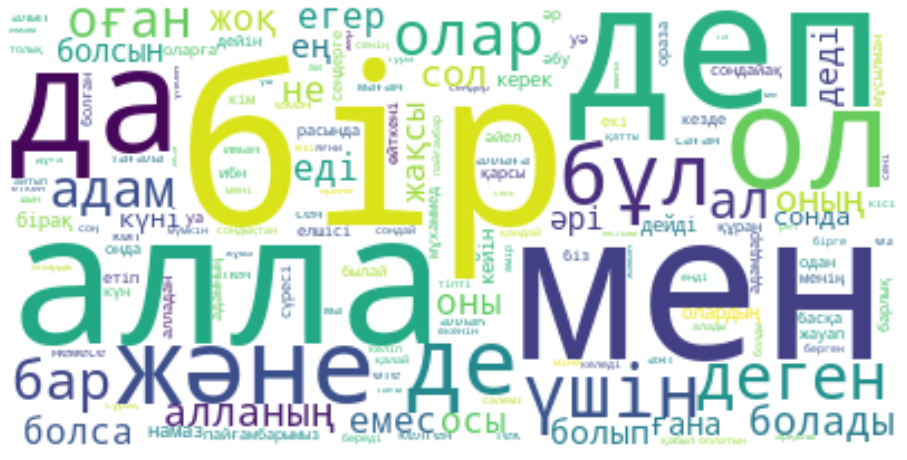

In [11]:
unidict = dict(unigram_df_t.values)
wordcloud = WordCloud(max_words=2000,background_color="white").generate_from_frequencies(unidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

unidict = dict(unigram_df_n.values)
wordcloud = WordCloud(max_words=2000,background_color="white").generate_from_frequencies(unidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bigram



Bigram : 
                      term  value
84083       сонымен қатар    121
83025         содан кейін    115
46972           және оның    114
46963        және олардың     92
30582       деп мәлімдеді     89
21041      болып табылады     86
46345            және біз     76
89476            тағы бір     75
46960           және олар     75
117734             әлі де     71
46378            және бұл     69
46285          және басқа     67
16374            басқа да     67
90374   терроризмге қарсы     66
101453     экстремизм мен     66
84067       сонымен бірге     64
20912        болуы мүмкін     63
32189     діни экстремизм     61
32990           егер олар     60
29808             деді ол     58


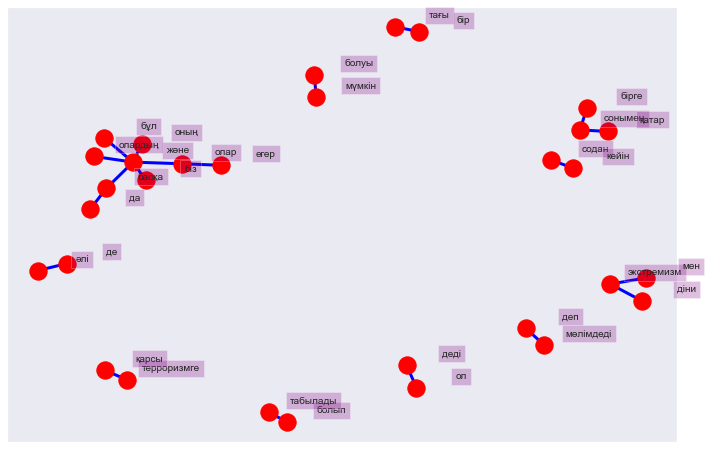



Bigram : 
                     term  value
25330        алла тағала   1569
416734     сәлемі болсын    788
412392        сүресі аят    772
298427        мен сәлемі    749
354675      оған алланың    676
233997       игілігі мен    668
371089       разы болсын    589
141146         деп жауап    566
24798        алла елшісі    560
26544    алланың игілігі    517
27904       аллаһ тағала    505
108026          бір күні    489
94423           болса да    478
527701       қиямет күні    469
483885       шын мәнінде    466
164454  ерекше мейірімді    425
25339     алла тағаланың    423
28495          аллаһу та    419
101705       былай дейді    395
3607         адам баласы    354


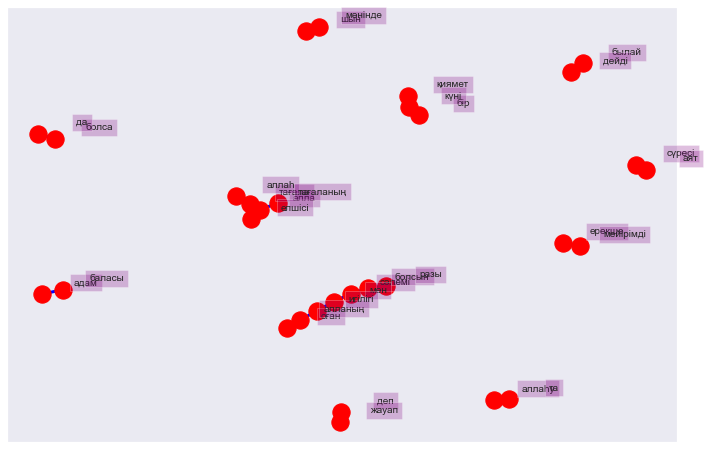

In [12]:
bigram_df_t = get_gram(df.loc[df['label'] == 1].text.tolist(), 2)
print ("\n\nBigram : \n", bigram_df_t.head(n_tops))
plotting_ngram(bigram_df_t, n_tops)

bigram_df_n = get_gram(df.loc[df['label'] == 0].text.tolist(), 2)
print ("\n\nBigram : \n", bigram_df_n.head(n_tops))
plotting_ngram(bigram_df_n, n_tops)

[Text(0, 0, 'сонымен қатар'),
 Text(0, 0, 'содан кейін'),
 Text(0, 0, 'және оның'),
 Text(0, 0, 'және олардың'),
 Text(0, 0, 'деп мәлімдеді'),
 Text(0, 0, 'болып табылады'),
 Text(0, 0, 'және біз'),
 Text(0, 0, 'тағы бір'),
 Text(0, 0, 'және олар'),
 Text(0, 0, 'әлі де'),
 Text(0, 0, 'және бұл'),
 Text(0, 0, 'және басқа'),
 Text(0, 0, 'басқа да'),
 Text(0, 0, 'терроризмге қарсы'),
 Text(0, 0, 'экстремизм мен'),
 Text(0, 0, 'сонымен бірге'),
 Text(0, 0, 'болуы мүмкін'),
 Text(0, 0, 'діни экстремизм'),
 Text(0, 0, 'егер олар'),
 Text(0, 0, 'деді ол')]

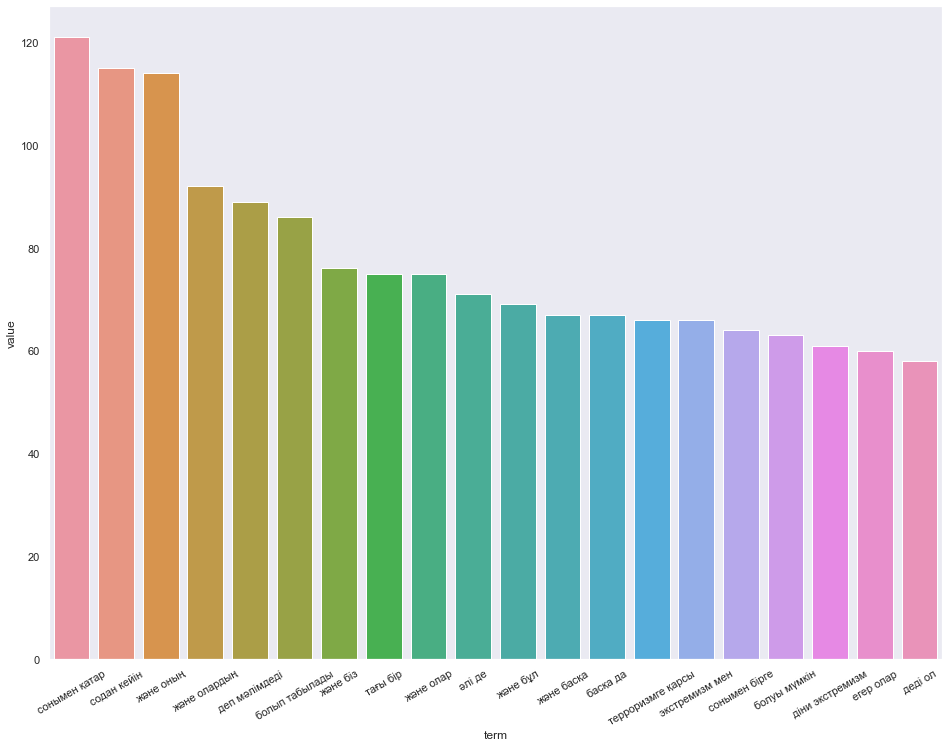

In [13]:
g = sns.barplot(x="term", y="value", data=bigram_df_t[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'алла тағала'),
 Text(0, 0, 'сәлемі болсын'),
 Text(0, 0, 'сүресі аят'),
 Text(0, 0, 'мен сәлемі'),
 Text(0, 0, 'оған алланың'),
 Text(0, 0, 'игілігі мен'),
 Text(0, 0, 'разы болсын'),
 Text(0, 0, 'деп жауап'),
 Text(0, 0, 'алла елшісі'),
 Text(0, 0, 'алланың игілігі'),
 Text(0, 0, 'аллаһ тағала'),
 Text(0, 0, 'бір күні'),
 Text(0, 0, 'болса да'),
 Text(0, 0, 'қиямет күні'),
 Text(0, 0, 'шын мәнінде'),
 Text(0, 0, 'ерекше мейірімді'),
 Text(0, 0, 'алла тағаланың'),
 Text(0, 0, 'аллаһу та'),
 Text(0, 0, 'былай дейді'),
 Text(0, 0, 'адам баласы')]

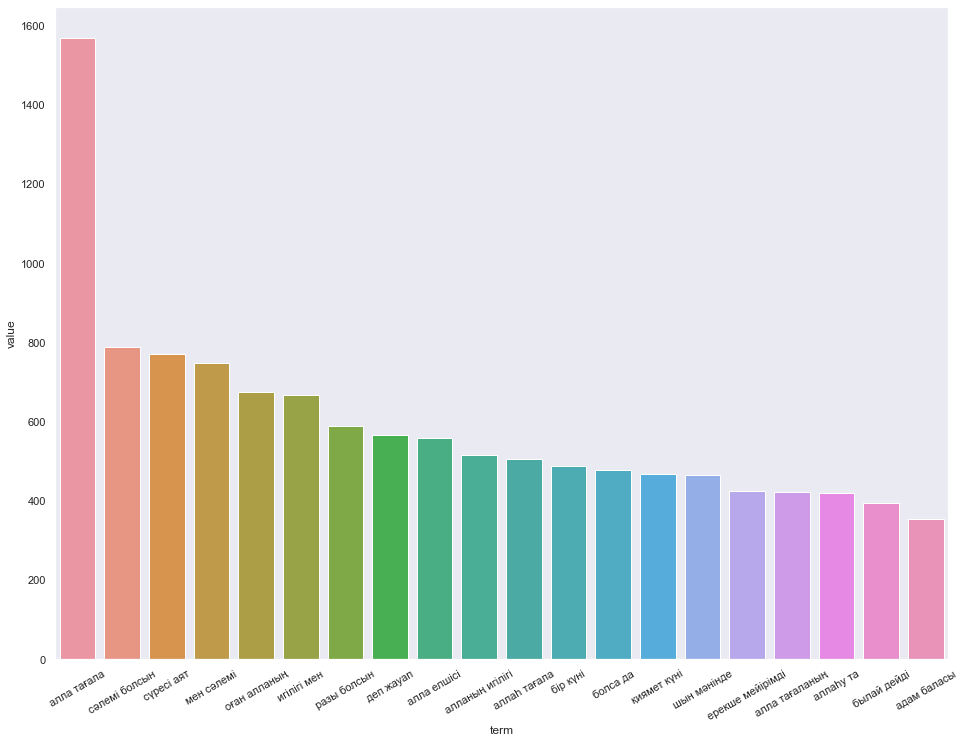

In [14]:
g = sns.barplot(x="term", y="value", data=bigram_df_n[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

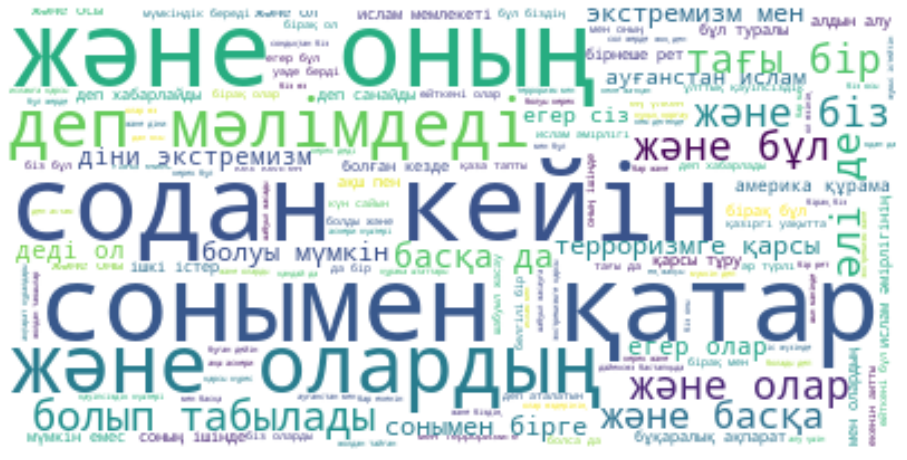

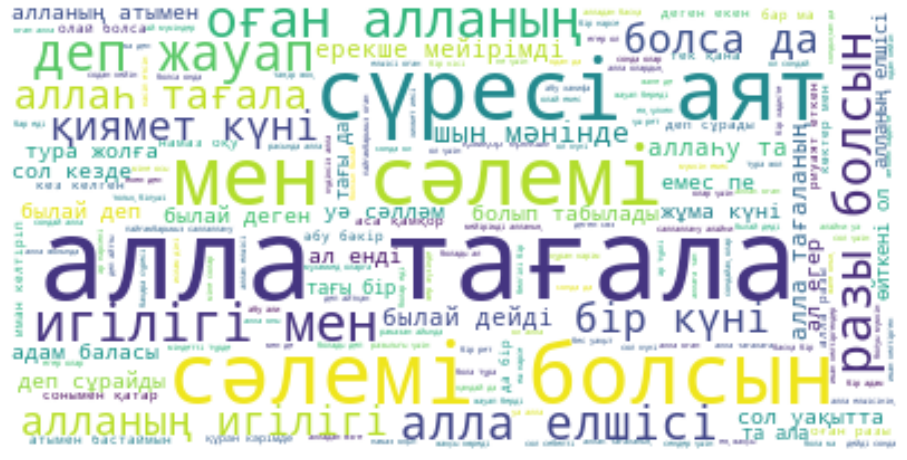

In [15]:
bidict = dict(bigram_df_t.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(bidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

bidict = dict(bigram_df_n.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(bidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Trigram

In [16]:
trigram_df_t = get_gram(df.loc[df['label'] == 1].text.tolist(), 3)



Trigram : 
                                   term  value
56992                    және басқа да     35
39914              діни экстремизм мен     31
123015      экстремизм мен терроризмге     30
127897                   қандай да бір     29
9008           америка құрама штаттары     27
77494            мен терроризмге қарсы     26
13305         ауғанстан ислам әмірлігі     25
13308      ауғанстан ислам әмірлігінің     25
33170      бұқаралық ақпарат құралдары     18
129096                 қарсы тұру үшін     17
142190                 әлі күнге дейін     15
123018     экстремизм мен терроризмнің     15
33175   бұқаралық ақпарат құралдарында     15
9015        америка құрама штаттарының     15
92057                осы уақытқа дейін     14
110475       терроризмге қарсы ісқимыл     13
109387                    тағы бір рет     13
110400        терроризм мен экстремизм     13
139709     ұлттық қауіпсіздік комитеті     13
123014        экстремизм мен терроризм     12


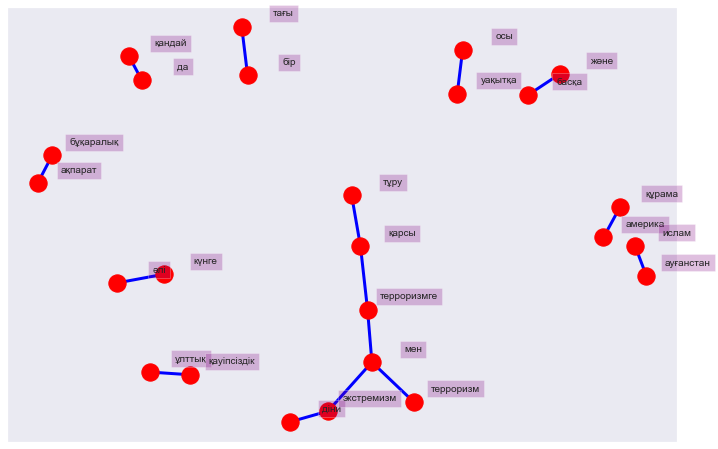

In [17]:
print ("\n\nTrigram : \n", trigram_df_t.head(n_tops))
plotting_ngram(trigram_df_t, n_tops)

In [18]:
trigram_df_n = get_gram(df.loc[df['label'] == 0].text.tolist(), 3)



Trigram : 
                             term  value
407992         мен сәлемі болсын    740
324792        игілігі мен сәлемі    640
39112        алланың игілігі мен    513
486384      оған алланың игілігі    465
62789          аса қамқор ерекше    226
487486          оған разы болсын    225
690736   қамқор ерекше мейірімді    223
38499   алланың атымен бастаймын    223
234665  ерекше мейірімді алланың    219
43447              аллаһу та ала    214
35188           алла разы болсын    211
402607  мейірімді алланың атымен    210
50946           аләйһи уә сәлләм    185
520549      саллаллаһу аләйһи уә    184
200368          деп жауап береді    162
200364           деп жауап берді    154
459076            ол сондай алла    150
228952       елшісі оған алланың    148
691641             қандай да бір    135
569398       сәлемі болсын былай    131


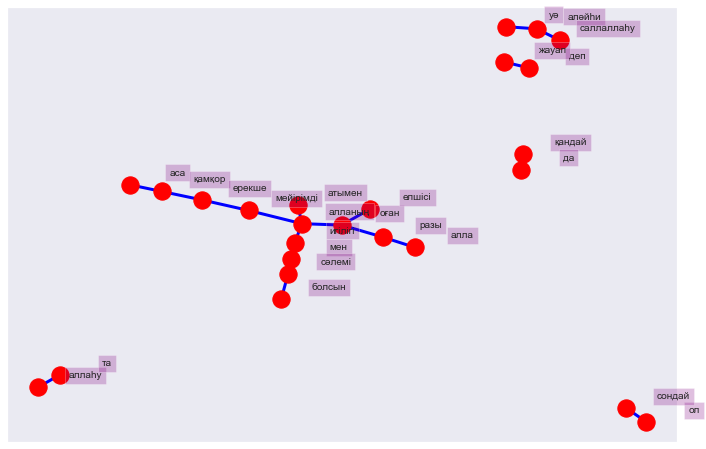

In [19]:
print ("\n\nTrigram : \n", trigram_df_n.head(n_tops))
plotting_ngram(trigram_df_n, n_tops)

[Text(0, 0, 'және басқа да'),
 Text(0, 0, 'діни экстремизм мен'),
 Text(0, 0, 'экстремизм мен терроризмге'),
 Text(0, 0, 'қандай да бір'),
 Text(0, 0, 'америка құрама штаттары'),
 Text(0, 0, 'мен терроризмге қарсы'),
 Text(0, 0, 'ауғанстан ислам әмірлігі'),
 Text(0, 0, 'ауғанстан ислам әмірлігінің'),
 Text(0, 0, 'бұқаралық ақпарат құралдары'),
 Text(0, 0, 'қарсы тұру үшін'),
 Text(0, 0, 'әлі күнге дейін'),
 Text(0, 0, 'экстремизм мен терроризмнің'),
 Text(0, 0, 'бұқаралық ақпарат құралдарында'),
 Text(0, 0, 'америка құрама штаттарының'),
 Text(0, 0, 'осы уақытқа дейін'),
 Text(0, 0, 'терроризмге қарсы ісқимыл'),
 Text(0, 0, 'тағы бір рет'),
 Text(0, 0, 'терроризм мен экстремизм'),
 Text(0, 0, 'ұлттық қауіпсіздік комитеті'),
 Text(0, 0, 'экстремизм мен терроризм')]

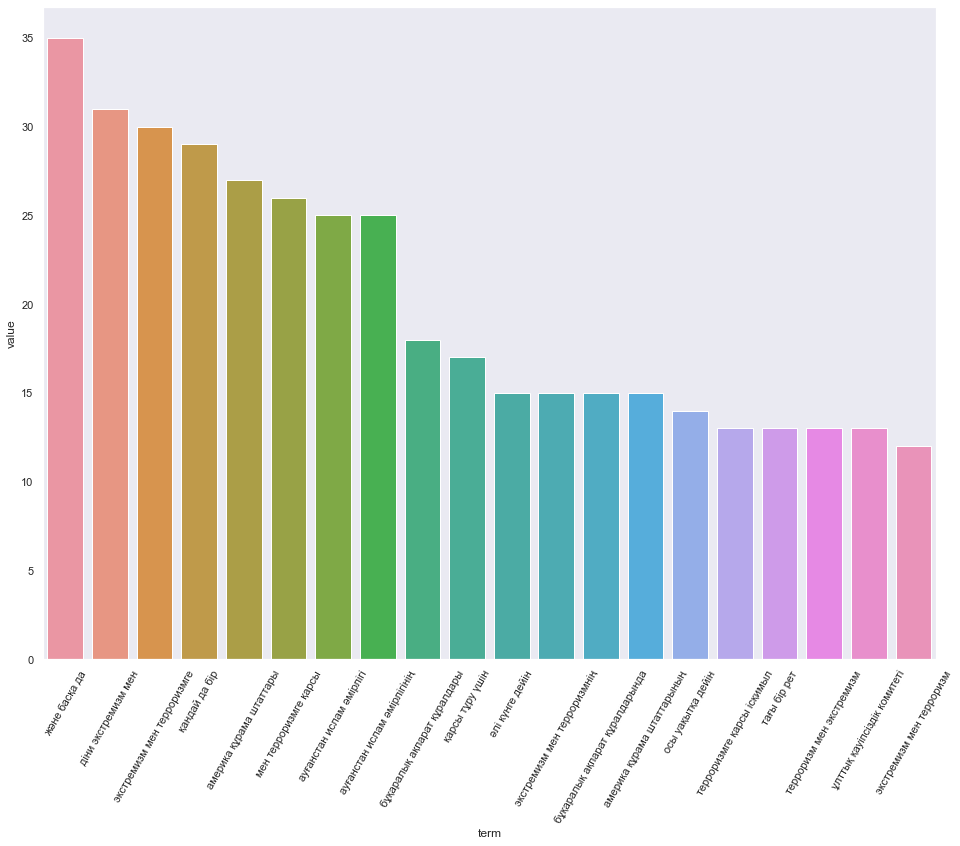

In [20]:
g = sns.barplot(x="term", y="value", data=trigram_df_t[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=60)

[Text(0, 0, 'мен сәлемі болсын'),
 Text(0, 0, 'игілігі мен сәлемі'),
 Text(0, 0, 'алланың игілігі мен'),
 Text(0, 0, 'оған алланың игілігі'),
 Text(0, 0, 'аса қамқор ерекше'),
 Text(0, 0, 'оған разы болсын'),
 Text(0, 0, 'қамқор ерекше мейірімді'),
 Text(0, 0, 'алланың атымен бастаймын'),
 Text(0, 0, 'ерекше мейірімді алланың'),
 Text(0, 0, 'аллаһу та ала'),
 Text(0, 0, 'алла разы болсын'),
 Text(0, 0, 'мейірімді алланың атымен'),
 Text(0, 0, 'аләйһи уә сәлләм'),
 Text(0, 0, 'саллаллаһу аләйһи уә'),
 Text(0, 0, 'деп жауап береді'),
 Text(0, 0, 'деп жауап берді'),
 Text(0, 0, 'ол сондай алла'),
 Text(0, 0, 'елшісі оған алланың'),
 Text(0, 0, 'қандай да бір'),
 Text(0, 0, 'сәлемі болсын былай')]

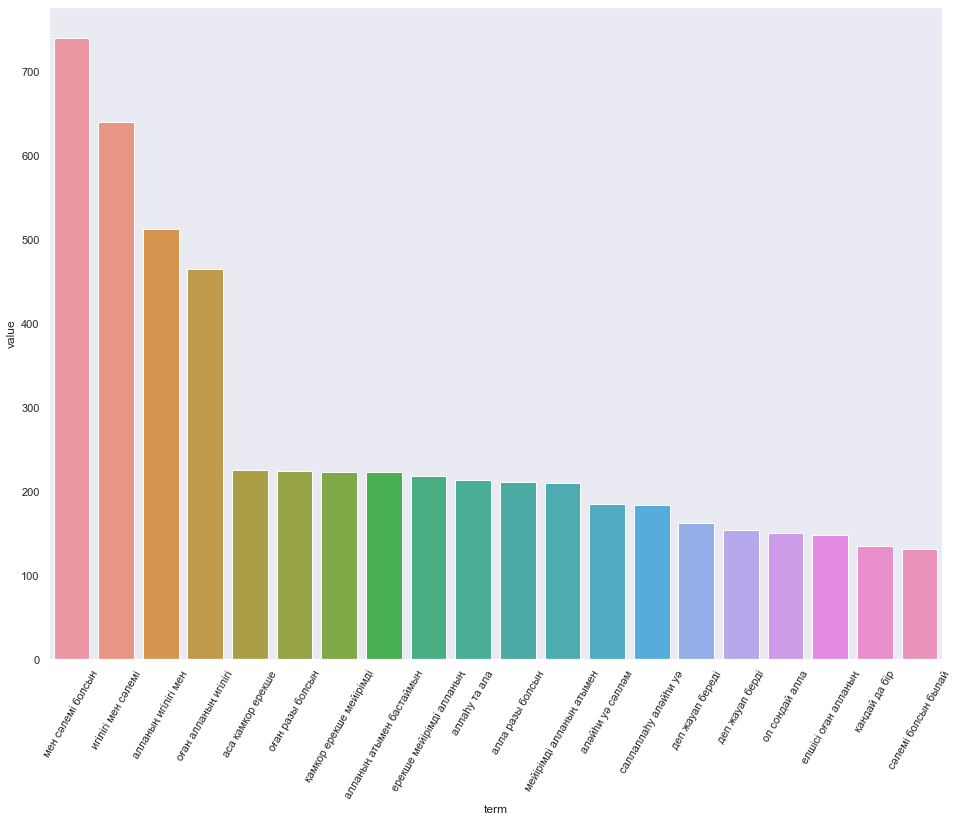

In [21]:
g = sns.barplot(x="term", y="value", data=trigram_df_n[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=60)

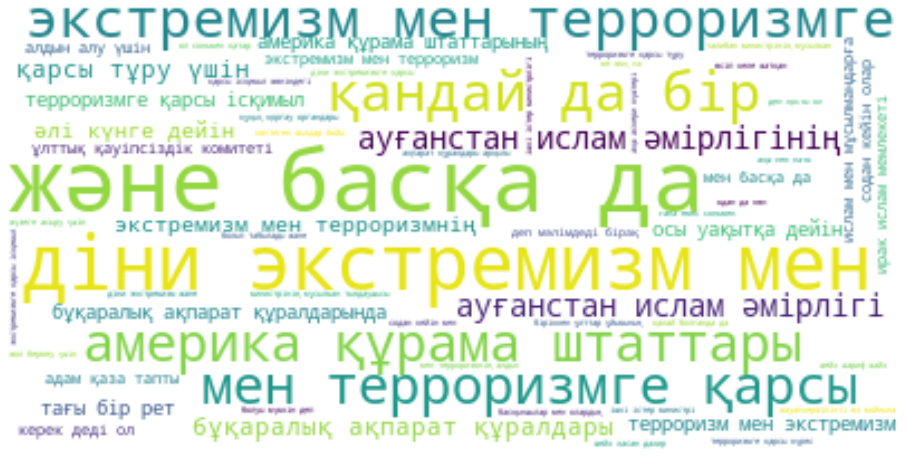

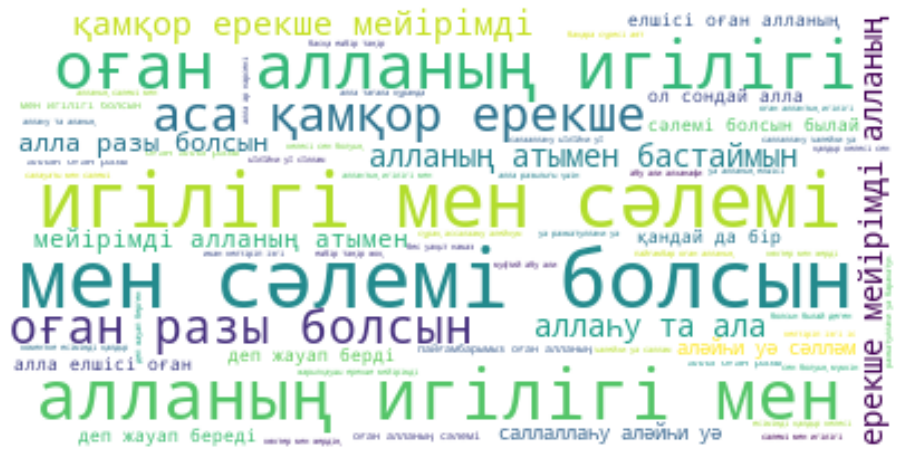

In [22]:
tridict = dict(trigram_df_t.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(tridict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

tridict = dict(trigram_df_n.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(tridict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Quadrigram